**Sentimental Analysis of Tweets using snscrape**

Here we are using snscrape and vader package from nltk to analyse tweets on the queen Elizabeth death
We are using 4 parameters


*   Text query = queen dies
*   number of tweets =1000

*   start and end date

In [60]:
!pip install -q snscrape==0.3.4

In [75]:
import os
import pandas as pd
import numpy
from datetime import date
import matplotlib.pyplot as plt

In [62]:
tweet_count=1000
today=date.today()
text_query='Queen dies'
from_date='2021-09-07'
to_date=today


**extracting tweets links using snscrape**

In [53]:

os.system(f"snscrape --max-results {tweet_count} --since {from_date} twitter-search '{text_query} until:{to_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

Number Of Tweets : 1000


In [54]:
df.head

<bound method NDFrame.head of                                                   link
0    https://twitter.com/NewYorkTroll/status/156875...
1    https://twitter.com/PJEvans66030270/status/156...
2    https://twitter.com/WXYNEKYLE/status/156875116...
3    https://twitter.com/rickb180675/status/1568751...
4    https://twitter.com/Joeyjonz/status/1568751161...
..                                                 ...
995  https://twitter.com/StuDiligence/status/156874...
996  https://twitter.com/WeebJeet/status/1568749953...
997  https://twitter.com/LATNO2/status/156874995286...
998  https://twitter.com/robert811399/status/156874...
999  https://twitter.com/WillaHawn/status/156874994...

[1000 rows x 1 columns]>

**Extracting Exact Tweets**

In [63]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {tweet_count} --since {from_date} twitter-search '{text_query} until:{to_date}' > extracted_tweets.txt"
os.system(extracted_tweets)

if os.stat("extracted_tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  dfcontent=pd.read_csv('extracted_tweets.txt', names=['content'])
  content_size=dfcontent.size
  dfcontent.head()
print('number of actual tweets' + str(dfcontent))

number of actual tweets                                                                                              content
'@filled_popcorn They will choke ooo                                            let them die abeg 😂😂'
@brittanygadoury A Queen who wacked birds in th...                                                NaN
'@starry_velvet @HealeyErika The queen dies and...                                                NaN
'the queen dies and somehow the british media h...                                                NaN
'Video: Die Queen ist tot – #das zweite elisabe...                                                NaN
...                                                                                               ...
'1) Queen dies\n2) Football postponed\n3) Crist...   sale of vegetables outlawed https://t.co/UXEP...
'One Queen dies and another returns https://t.c...                                                NaN
'I don’t get it anymore.\n- ETH goes up                    

**creating a function which cleans data by removing user names(words beginning with @)**

In [64]:
def tweet_cleaner(tweet):
    split_list = tweet.split(" ")
    cleaned_list = [w for w in split_list if w.find("@") < 0]
    cleaned_tweet = " ".join([i for i in cleaned_list])
    
    return cleaned_tweet

In [74]:
dfcontent = dfcontent[dfcontent['content'].notnull()]
dfcontent['cleaned_tweets'] = dfcontent['content'].apply(lambda x: tweet_cleaner(x))
dfcontent.tail()

,content,cleaned_tweets,sentiment_scores
'Herzogin Meghan begleitete Prinz Harry nicht,als die Queen verstarb. Jetzt könnte sie auch...,als die Queen verstarb. Jetzt könnte sie auch...,-0.5994
'Queen Elizabeth II - Committed Christian,Dies at 96 - End of an Era on Paul’s Defense ...,Dies at 96 - End of an Era on Paul’s Defense ...,0.1280
'1) Queen dies\n2) Football postponed\n3) Cristiano Ronaldo meets Jordan Peterson\n...\n12) Democratic institutions desolved in Portugal,sale of vegetables outlawed https://t.co/UXEP...,sale of vegetables outlawed https://t.co/UXEP...,0.0000
'I don’t get it anymore.\n- ETH goes up,NFTs go down\n- ETH goes down,NFTs go down\n- ETH goes down,0.0000
'The Queen dies: Look back at Elizabeth II’s classic fashion sense,bright outfits and matching\xa0hats https://t...,bright outfits and matching\xa0hats https://t...,0.4404


**importing nltk libraries and sentiment analyser from vader package**

In [71]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**removing data from non english since it can hamper with results**

In [77]:
dfcontent['sentiment_scores'] = dfcontent['cleaned_tweets'].apply(lambda x: sid.polarity_scores(x)['compound'])
dfcontent.drop(dfcontent[(dfcontent['sentiment_scores'] ==0)].index, inplace=True)
dfcontent[['cleaned_tweets', 'sentiment_scores']].head(5)

,cleaned_tweets,sentiment_scores
'@filled_popcorn They will choke ooo,let them die abeg 😂😂',-0.5994
'@rofhiwa_abigail @chucklateyeka Why nah 😂😂😂,come be say nah now wey our Queen don die,-0.6486
'Watching an Irish comedian 2 days after the queen dies is an incomparable experience,20/10 would recommend',0.3612
'Bin ich die Einzige,die wegen der Queen nicht traurig ist,-0.5994
'Shame. The next time we see the headline,The Queen Has Died will probably be when this ...,-0.5574


Histogram of sentiment scores

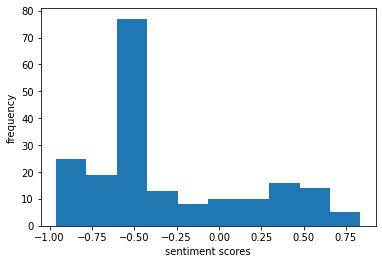

In [78]:
plot1=plt.hist(dfcontent['sentiment_scores']);
plot1=plt.xlabel('sentiment scores');
plot1=plt.ylabel('frequency');
binedges=[-1 -0.9 -0.8 -0.]
plt.show()